In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time


### Load Dataset

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [4]:
train_data_dir = "D:/Deep Fake Detection/train"
test_data_dir = "D:/Deep Fake Detection/test"

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 1840 files belonging to 2 classes.
Using 1656 files for training.
Found 1840 files belonging to 2 classes.
Using 184 files for validation.
Found 200 files belonging to 2 classes.


In [5]:
class_names = train_data.class_names
class_names

['fake', 'real']

In [6]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


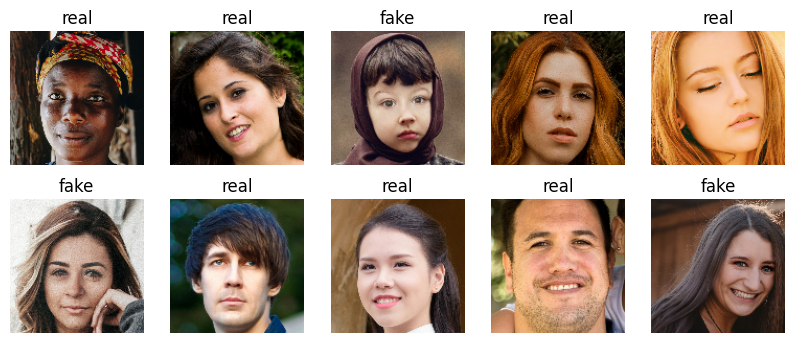

In [7]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

### Scaling Images

In [8]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[3.59169922e+01 3.79169922e+01 3.29169922e+01]
   [3.66875000e+01 3.86875000e+01 3.36875000e+01]
   [3.51904297e+01 3.69716797e+01 3.22158203e+01]
   ...
   [4.52783203e+01 4.79658203e+01 4.11220703e+01]
   [4.62294922e+01 4.72294922e+01 3.92294922e+01]
   [4.50244141e+01 4.60244141e+01 4.00244141e+01]]

  [[3.70205078e+01 3.90205078e+01 3.50830078e+01]
   [3.58466797e+01 3.78466797e+01 3.39091797e+01]
   [3.75312500e+01 3.97500000e+01 3.43125000e+01]
   ...
   [4.67275391e+01 4.88974609e+01 4.03125000e+01]
   [4.63154297e+01 4.73154297e+01 3.93154297e+01]
   [4.55214844e+01 4.65214844e+01 4.05214844e+01]]

  [[3.60000000e+01 3.80000000e+01 3.30000000e+01]
   [3.75849609e+01 3.95849609e+01 3.45849609e+01]
   [3.57812500e+01 3.77812500e+01 3.27812500e+01]
   ...
   [4.62187500e+01 4.76562500e+01 4.14375000e+01]
   [4.60000000e+01 4.70000000e+01 4.10000000e+01]
   [4.48437500e+01 4.61562500e+01 4.00000000e+01]]

  ...

  [[4.25029297e+01 4.55029297e+01 3.85029297e+01]
   [4

In [9]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [10]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.6001915  0.4472503  0.27862287]
   [0.6135991  0.4645795  0.31163833]
   [0.61077285 0.46175322 0.30881205]
   ...
   [0.2615196  0.14779411 0.03014706]
   [0.25547257 0.14174709 0.02410003]
   [0.2617494  0.1480239  0.03037684]]

  [[0.6165824  0.4675628  0.29109222]
   [0.62880284 0.4837048  0.31899893]
   [0.62300473 0.4719018  0.31896064]
   ...
   [0.25560278 0.1418773  0.02423024]
   [0.2598001  0.14607461 0.02842754]
   [0.258498   0.14477251 0.02712546]]

  [[0.62352943 0.47843137 0.30588236]
   [0.6308479  0.48182827 0.3288871 ]
   [0.61655176 0.46753216 0.314591  ]
   ...
   [0.25777802 0.14013097 0.03032705]
   [0.2542892  0.14056373 0.02291667]
   [0.25759804 0.14387254 0.02622549]]

  ...

  [[0.6701861  0.57118946 0.45095742]
   [0.66685814 0.5758578  0.45469132]
   [0.66409314 0.56213236 0.45625   ]
   ...
   [0.28407627 0.16642922 0.06275276]
   [0.28989735 0.1722503  0.07028952]
   [0.28041515 0.16276808 0.05296415]]

  [[0.6869294  0.57320386 0.443386

### Data Augmentation

In [11]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

C:\Users\Dilshan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Building

In [12]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

### Model Training

In [15]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 38s 607ms/step - accuracy: 0.5500 - loss: 0.7134 - val_accuracy: 0.4239 - val_loss: 0.7006
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 612ms/step - accuracy: 0.5767 - loss: 0.6881 - val_accuracy: 0.5924 - val_loss: 0.6781
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 603ms/step - accuracy: 0.5753 - loss: 0.6771 - val_accuracy: 0.5924 - val_loss: 0.6794
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 594ms/step - accuracy: 0.5805 - loss: 0.6780 - val_accuracy: 0.5924 - val_loss: 0.6741
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 614ms/step - accuracy: 0.5744 - loss: 0.6783 - val_accuracy: 0.5924 - val_loss: 0.6779
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 603ms/step - accuracy: 0.5981 - loss: 0.6755 - val_accuracy: 0.5870 - val_loss: 0.6718
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 33s 614ms/step - accuracy: 0.5792 - loss: 0.6802 - val_accuracy: 0.6033 - val_loss: 0.6663
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 33s 626ms/step - accuracy: 0.5841 - loss: 0.6647 - val_accu

In [16]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 653.033 seconds


### Performance Analysis

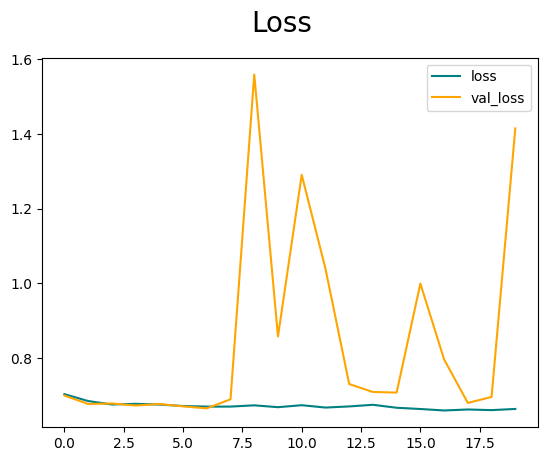

In [17]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

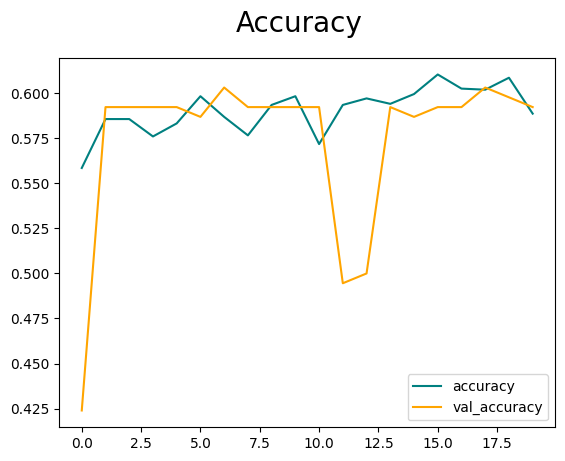

In [18]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

### Model Evaluation

In [19]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [20]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


In [21]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [22]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [23]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

### Test

In [24]:
!pip install opencv-python -q


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import cv2

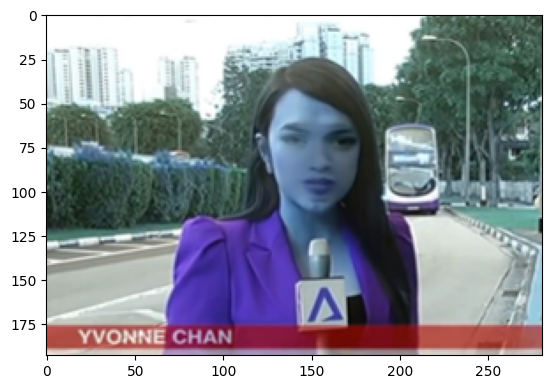

In [50]:
img = cv2.imread('C:/Users/Dilshan/Desktop/1.png')
plt.imshow(img)
plt.show()

In [51]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [52]:
scaled_image.shape

TensorShape([128, 128, 3])

In [53]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [54]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


In [55]:
yhat

array([[0.88697606]], dtype=float32)

In [56]:
class_names

['fake', 'real']

In [57]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

real
